In [1]:
from tree_parser import file_contents, meta_math_database

from my_utils import print_proof_props_graph, get_proof_steps, print_ident_proof, print_proof_linear_steps
from my_utils import get_proof_steps_graph, print_proof_steps_graph


from expanding import construct_proof, expand_proof_step_ps

from collections import defaultdict

import glob

import os

import numpy as np

from sklearn.metrics import roc_auc_score

import random

In [2]:
%%time

text = file_contents("set_lucas.mm")
database = meta_math_database(text,n=4000)

included 5555930 tokens from set_lucas.mm
proposition: 4000CPU times: user 11.4 s, sys: 289 ms, total: 11.7 s
Wall time: 11.8 s


In [3]:
#Load test data
testdata = dict()
for f in glob.glob(os.path.join("test_data", "*.txt")):
    f_rev = "".join(reversed(f))
    f_name = "".join(reversed(f_rev[4:f_rev.index("/")]))
    testdata[f_name] = [l[:-1] for l in open(f).readlines() if len(l) > 2]

In [4]:
for p in database.propositions_list:
    if "lucas" in p.label:
        print(p.label)

t1lucas
t2lucas
t4lucas
t5lucas


t2lucas 3667


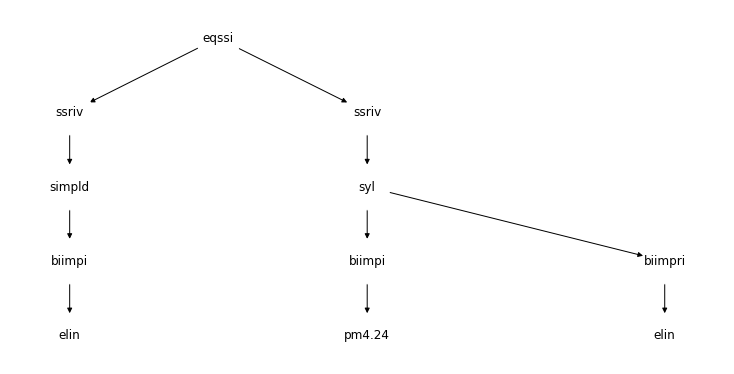

 <PStep:eqssi ⊢ ( A ∩ A ) = A>
 |  <PStep:ssriv ⊢ ( A ∩ A ) ⊆ A>
 |  |  <PStep:simpld ⊢ ( x ∈ ( A ∩ A ) → x ∈ A )>
 |  |  |  <PStep:biimpi ⊢ ( x ∈ ( A ∩ A ) → ( x ∈ A ∧ x ∈ A ) )>
 |  |  |  |  <PStep:elin ⊢ ( x ∈ ( A ∩ A ) ↔ ( x ∈ A ∧ x ∈ A ) )>
 |  <PStep:ssriv ⊢ A ⊆ ( A ∩ A )>
 |  |  <PStep:syl ⊢ ( x ∈ A → x ∈ ( A ∩ A ) )>
 |  |  |  <PStep:biimpi ⊢ ( x ∈ A → ( x ∈ A ∧ x ∈ A ) )>
 |  |  |  |  <PStep:pm4.24 ⊢ ( x ∈ A ↔ ( x ∈ A ∧ x ∈ A ) )>
 |  |  |  <PStep:biimpri ⊢ ( ( x ∈ A ∧ x ∈ A ) → x ∈ ( A ∩ A ) )>
 |  |  |  |  <PStep:elin ⊢ ( x ∈ ( A ∩ A ) ↔ ( x ∈ A ∧ x ∈ A ) )>


In [5]:
prop = database.propositions["t2lucas"]
#prop = database.propositions_list[-1]
print(prop.label, prop.number)
prop_proof = construct_proof(prop)
prop_proof.print_graph()
prop_proof.print_linear()

In [6]:
prop_proof.get_steps_df()

[<PStep:eqssi ⊢ ( A ∩ A ) = A>,
 <PStep:ssriv ⊢ ( A ∩ A ) ⊆ A>,
 <PStep:simpld ⊢ ( x ∈ ( A ∩ A ) → x ∈ A )>,
 <PStep:biimpi ⊢ ( x ∈ ( A ∩ A ) → ( x ∈ A ∧ x ∈ A ) )>,
 <PStep:elin ⊢ ( x ∈ ( A ∩ A ) ↔ ( x ∈ A ∧ x ∈ A ) )>,
 <PStep:ssriv ⊢ A ⊆ ( A ∩ A )>,
 <PStep:syl ⊢ ( x ∈ A → x ∈ ( A ∩ A ) )>,
 <PStep:biimpi ⊢ ( x ∈ A → ( x ∈ A ∧ x ∈ A ) )>,
 <PStep:pm4.24 ⊢ ( x ∈ A ↔ ( x ∈ A ∧ x ∈ A ) )>,
 <PStep:biimpri ⊢ ( ( x ∈ A ∧ x ∈ A ) → x ∈ ( A ∩ A ) )>,
 <PStep:elin ⊢ ( x ∈ ( A ∩ A ) ↔ ( x ∈ A ∧ x ∈ A ) )>]

In [7]:
def get_prop_steps_gt(prop):
    if prop.label not in testdata:
        raise Exception(f"Propostion {prop.label} not in testdata.")
    
    prop_proof = construct_proof(prop)
    prop_steps = prop_proof.get_steps_df()
    
    prop_steps_gt = list()
    for s in prop_steps:
        gt = 0
        #print(s.label + " ⊢ " + s.statement)
        if s.label + " ⊢ " + s.statement in testdata[prop.label]:
            gt = 1
        prop_steps_gt.append((s, gt))
        
    return prop_steps_gt

In [8]:
prop_steps = get_prop_steps_gt(database.propositions["t2lucas"])
prop_steps

[(<PStep:eqssi ⊢ ( A ∩ A ) = A>, 0),
 (<PStep:ssriv ⊢ ( A ∩ A ) ⊆ A>, 0),
 (<PStep:simpld ⊢ ( x ∈ ( A ∩ A ) → x ∈ A )>, 1),
 (<PStep:biimpi ⊢ ( x ∈ ( A ∩ A ) → ( x ∈ A ∧ x ∈ A ) )>, 1),
 (<PStep:elin ⊢ ( x ∈ ( A ∩ A ) ↔ ( x ∈ A ∧ x ∈ A ) )>, 0),
 (<PStep:ssriv ⊢ A ⊆ ( A ∩ A )>, 0),
 (<PStep:syl ⊢ ( x ∈ A → x ∈ ( A ∩ A ) )>, 1),
 (<PStep:biimpi ⊢ ( x ∈ A → ( x ∈ A ∧ x ∈ A ) )>, 1),
 (<PStep:pm4.24 ⊢ ( x ∈ A ↔ ( x ∈ A ∧ x ∈ A ) )>, 0),
 (<PStep:biimpri ⊢ ( ( x ∈ A ∧ x ∈ A ) → x ∈ ( A ∩ A ) )>, 0),
 (<PStep:elin ⊢ ( x ∈ ( A ∩ A ) ↔ ( x ∈ A ∧ x ∈ A ) )>, 0)]

In [9]:
prop_steps = get_prop_steps_gt(database.propositions["t2lucas"])

### Baseline Naive Classifier Based on amount of symbols
predictions = list()
for s, _ in prop_steps:
    predictions.append(len(s.statement.split(" ")))
    
predictions = np.array(predictions)

#Get max value and normalize by it
max_pred = predictions.max()
predictions = 1 - predictions / max_pred
predictions

gts = np.array([gt for _, gt in prop_steps])
gts

print(roc_auc_score(gts, predictions))

0.4642857142857143


In [10]:
prop_steps = get_prop_steps_gt(database.propositions["t1lucas"])

### Baseline Naive Classifier Based on amount of symbols
predictions = list()
for s, _ in prop_steps:
    predictions.append(len(s.statement.split(" ")))
    
predictions = np.array(predictions)

#Get max value and normalize by it
max_pred = predictions.max()
predictions = 1 - predictions / max_pred
predictions

gts = np.array([gt for _, gt in prop_steps])
gts

print(roc_auc_score(gts, predictions))

0.8222222222222222


In [11]:
prop_steps = get_prop_steps_gt(database.propositions["t4lucas"])

### Baseline Naive Classifier Based on amount of symbols
predictions = list()
for s, _ in prop_steps:
    predictions.append(len(s.statement.split(" ")))
    
predictions = np.array(predictions)

#Get max value and normalize by it
max_pred = predictions.max()
predictions = 1 - predictions / max_pred
predictions

gts = np.array([gt for _, gt in prop_steps])
gts

#prop_steps[0][0].print_linear()

print(roc_auc_score(gts, predictions))

0.861111111111111


In [12]:
prop_steps = get_prop_steps_gt(database.propositions["t5lucas"])

### Baseline Naive Classifier Based on amount of symbols
predictions = list()
for s, _ in prop_steps:
    predictions.append(len(s.statement.split(" ")))
    
predictions = np.array(predictions)

#Get max value and normalize by it
max_pred = predictions.max()
predictions = 1 - predictions / max_pred
predictions

gts = np.array([gt for _, gt in prop_steps])
gts

print(roc_auc_score(gts, predictions))

0.6435185185185185


In [13]:
prop_steps = get_prop_steps_gt(database.propositions["ssun1"])

### Baseline Naive Classifier Based on amount of symbols
predictions = list()
for s, _ in prop_steps:
    predictions.append(len(s.statement.split(" ")))
    
predictions = np.array(predictions)

#Get max value and normalize by it
max_pred = predictions.max()
predictions = 1 - predictions / max_pred
predictions

gts = np.array([gt for _, gt in prop_steps])
gts

print(roc_auc_score(gts, predictions))

0.5


In [130]:
class BaseClf:
    def auc_score(self, X, y):
        predictions = self.predict(X)
        return roc_auc_score(y, predictions)

class WeightClassifier(BaseClf):   
    def predict(self, X):
        predictions = list()
        for s in X:
            predictions.append(len(s.statement.split(" ")))
        
        predictions = np.array(predictions)
        
        #Get max value and normalize by it
        max_pred = predictions.max()
        predictions = predictions/max_pred
        
        # The way it is the largest statement will get the value of 1
        # Here we will treat the positive class as the statement to be removed
        # In this classifier we want to keep only the small expressions      
        return predictions
    
class RandomClassifier(BaseClf):
    def predict(self, X):
        return np.random.random(len(X))
    
rand_clf = RandomClassifier()
weight_clf = WeightClassifier()

In [131]:
#computar metricas para teoremas baguncados

In [165]:
prop_proof = construct_proof(database.propositions["dfss2"])
gt_statements = [s.statement for s in prop_proof.get_steps_df()]

#Randomly expand 5 steps
for i in range(10):
    prop_proof = random.choice(prop_proof.get_steps_df()).expand()
    
prop_steps = prop_proof.get_steps_df()
#Everything within the original statements should not be hidden (class 0)
#in other words, every statement not in the original statements set should be hidden (class 1)
prop_ys = [int(s.statement not in gt_statements) for s in prop_steps]

print(prop_ys)

auc_value = weight_clf.auc_score(prop_steps, prop_ys)
auc_value

[0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1]


0.7188940092165899

In [175]:
def get_messed_prop_auc(prop, score_method=None, n_steps=50, n_expansions=20):
    """
        Generate random expansions to check how the score method can detect additional steps.
    """
    
    auc_values = []
    for _ in range(n_steps):

        prop_proof = construct_proof(database.propositions[prop])
        gt_statements = [s.statement for s in prop_proof.get_steps_df()]

        #Randomly expand steps
        for i in range(n_expansions):
            prop_proof = random.choice(prop_proof.get_steps_df()).expand()

        prop_steps = prop_proof.get_steps_df()
        #Everything within the original statements should not be hidden (class 0)
        prop_ys = [int(s.statement not in gt_statements) for s in prop_steps]

        auc_value = score_method(prop_steps, prop_ys)
        auc_values.append(auc_value)

    return np.mean(auc_values)

In [176]:
%%time 

prop_label = "dfss2"

print(get_messed_prop_auc(prop_label, weight_clf.auc_score))
print(get_messed_prop_auc(prop_label, rand_clf.auc_score))

0.6843839728694502
0.5262644814538252
CPU times: user 1.08 s, sys: 22.2 ms, total: 1.1 s
Wall time: 1.12 s


In [177]:
%%time 

prop_label = "dfss"

print(get_messed_prop_auc(prop_label, weight_clf.auc_score))
print(get_messed_prop_auc(prop_label, rand_clf.auc_score))

0.812007072586412
0.525394155600624
CPU times: user 628 ms, sys: 12.8 ms, total: 641 ms
Wall time: 638 ms


In [178]:
%%time 

prop_label = "dfss3"

print(get_messed_prop_auc(prop_label, weight_clf.auc_score))
print(get_messed_prop_auc(prop_label, rand_clf.auc_score))

0.8066508894118911
0.4789202885749023
CPU times: user 1.87 s, sys: 203 ms, total: 2.08 s
Wall time: 2.17 s


In [179]:
prop_label = "t1lucas"

print(get_messed_prop_auc(prop_label, weight_clf.auc_score))
print(get_messed_prop_auc(prop_label, rand_clf.auc_score))

0.6733644093448001
0.4785193966709822


In [123]:
determinar quais provas e quais passos vao ser usados para teste

SyntaxError: invalid syntax (3648115588.py, line 1)

In [180]:
prop_label = "t2lucas"

print(get_messed_prop_auc(prop_label, weight_clf.auc_score))
print(get_messed_prop_auc(prop_label, rand_clf.auc_score))

0.7851331026584378
0.48379436329139247


In [181]:
prop_label = "ssun1"

print(get_messed_prop_auc(prop_label, weight_clf.auc_score))
print(get_messed_prop_auc(prop_label, rand_clf.auc_score))

0.8108121986260788
0.5117019588823204


In [182]:
prop_label = "t5lucas"

print(get_messed_prop_auc(prop_label, weight_clf.auc_score))
print(get_messed_prop_auc(prop_label, rand_clf.auc_score))

0.6549941858753933
0.5037498693613266
